# Pymaceuticals Inc.
---

Treatment that used the drugs,Capomulin and Ramicane were most effective  in reducing tumor volume.
The studies that used Capomulin and Ramicane had more subjects 
All drugs irrespective of the sex of the mice.
The study  shows that tumor volume was directly proportional to the weight of the mouse

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = study_results.merge(mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [79]:
# Checking the number of mice.
mouse_count = combine_data['Mouse ID'].unique()
mouse_count = len(mouse_count)
mouse_count

249

In [80]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_dup= combine_data[combine_data.duplicated(['Mouse ID','Timepoint'],keep=False)]

In [81]:
# Optional: Get all the data for the duplicate mouse ID.
mice_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data[combine_data['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Checking the number of mice in the clean DataFrame.
mouse_count = combine_data['Mouse ID'].unique()
mouse_count = len(mouse_count)
mouse_count

249

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tum_vol = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
med_tum_vol = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tum_vol = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_tum_vol = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tum_vol = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Mean Tumor Vol": mean_tum_vol,"Median Tum Vol": med_tum_vol,"Tum Vol Variance": var_tum_vol,"Tum Vol Std.Dev.": std_tum_vol, 
                              "Tumor Vol Std.Err.": sem_tum_vol})

summary_stats

,Mean Tumor Vol,Median Tum Vol,Tum Vol Variance,Tum Vol Std.Dev.,Tumor Vol Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
another_summary = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
another_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

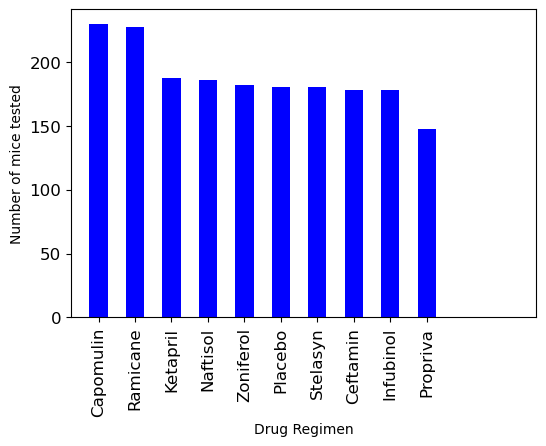

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_mice= clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
drug_mice.plot.bar(figsize=(6,4), color='b', fontsize= 12)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice tested')
plt.xlim(-.75,len('Drug Regimen'))
plt.show()   

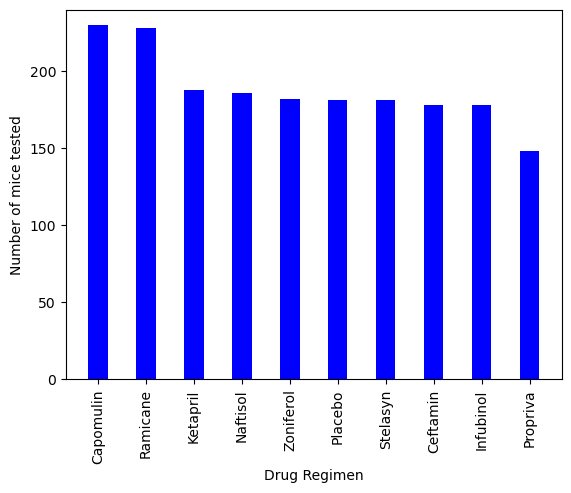

In [89]:
drug_mice= clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
mice_list = drug_mice.tolist()
mice_list

drug_mice_df= drug_mice.to_frame()
drug_mice_df1 = drug_mice_df.reset_index()
drug_list = drug_mice_df1['Drug Regimen'].tolist()
drug_list

plt.bar(drug_list, mice_list, color='b', width=0.4)
plt.xticks(rotation='vertical')
plt.ylim(0, max(mice_list)+10)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice tested')
plt.show()

<Axes: ylabel='count'>

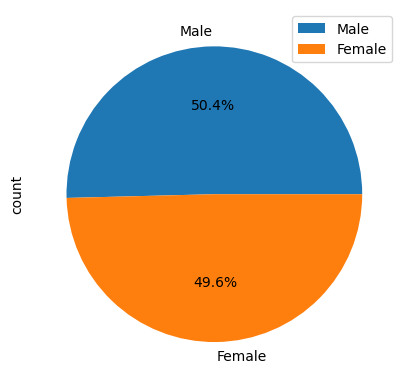

In [90]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_of_mouse = clean_df[['Mouse ID','Sex']]
sex_of_mouse = sex_of_mouse.drop_duplicates()

male_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Male']
male_mouse_count = male_mouse['Sex'].count()
male_mouse_count

female_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Female']
female_mouse_count= female_mouse['Sex'].count()

df=pd.DataFrame([{'Sex':'Male', 'count': male_mouse_count}, {'Sex':'Female', 'count': female_mouse_count}])
df.plot.pie( y='count',labels=['Male','Female'],autopct='%1.1f%%')
# Make the pie chart


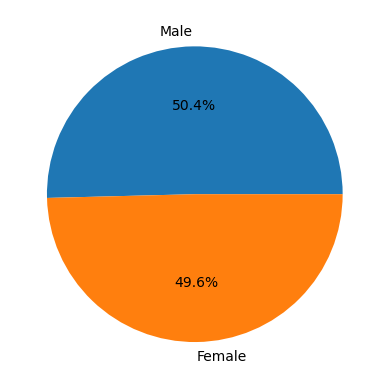

In [91]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
male_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Male']
male_mice = male_mouse['Sex'].count()

female_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Female']
female_mice= female_mouse['Sex'].count()

newdf=pd.DataFrame([{'Sex':'Male', 'count.': male_mice}, {'Sex':'Female', 'count': female_mice}])
y= np.array([male_mice, female_mice])

plt.pie(y, labels=['Male','Female'],autopct='%1.1f%%')
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs=clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')|
                                   (clean_df['Drug Regimen']=='Ramicane')|
                                   (clean_df['Drug Regimen']=='Infubinol')|
                                   (clean_df['Drug Regimen']=='Ceftamin'),:]
        
# Start by getting the last (greatest) timepoint for each mouse
four_drugs=four_drugs.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_drugs=pd.merge(four_drugs,clean_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']],
                    on=['Mouse ID','Timepoint'], how='left')

In [102]:
# Put treatments into a list for for loop (and later for plot labels)
treats=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[]for i in range(4)]
for x in range(100):
        drug= four_drugs.iloc[x,:]['Drug Regimen']
        tum= four_drugs.iloc[x,:]['Tumor Volume (mm3)']
        for y in range(4):
            if drug==treats[y]:
                Tumors[y].append(tum)
                continue

# Calculate the IQR and quantitatively determine if there are any potential outliers.
q1= [[] for i in range(4)]
q3= [[] for i in range(4)] 
qrt=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_limit=[[] for i in range(4)]
upper_limit=[[] for i in range(4)] 
pot_outls=[[] for i in range(4)]


    # Locate the rows which contain mice on each drug and get the tumor volumes
for n, num in enumerate(treats):
    qrt[n] = four_drugs.loc[four_drugs["Drug Regimen"]==num,:]["Tumor Volume (mm3)"].quantile([.25,0.5,.75])
    q1[n] = qrt[n][0.25]
    q3[n] = qrt[n][0.75]
    iqr[n] = q3[n]-q1[n]   
          

    # add subset
    print(f"The lower quartile of {num} tumor volume is: {q1[n]}")
    print(f"The upper quartile of {num} tumor volume is: {q3[n]}")
 
    # Determine outliers using upper and lower bounds


The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003


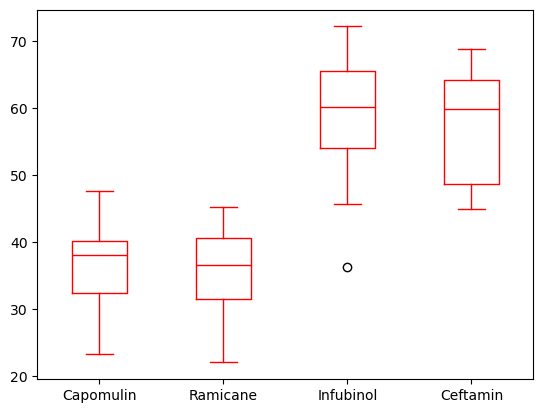

<Figure size 640x480 with 0 Axes>

In [98]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
Capomulin = [] 
Ramicane = [] 
Infubinol = [] 
Ceftamin = []

for x in range(100):
        drug= four_drugs.iloc[x,:]['Drug Regimen']
        tum= four_drugs.iloc[x,:]['Tumor Volume (mm3)']
        if drug=='Capomulin':
            Capomulin.append(tum)
        if drug=='Ramicane':
            Ramicane.append(tum)
        if drug=='Infubinol':
            Infubinol.append(tum)
        if drug=='Ceftamin':
            Ceftamin.append(tum)    
            continue

data =pd.DataFrame({'Capomulin':Capomulin, 'Ramicane': Ramicane, 'Infubinol':Infubinol, 'Ceftamin':Ceftamin})
ax = data[['Capomulin','Ramicane','Infubinol','Ceftamin']].plot(kind='box',color='red')
plt.show()
ax.set(ylabel='Final Tumor Volume (mm3)')
plt.tight_layout()

## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

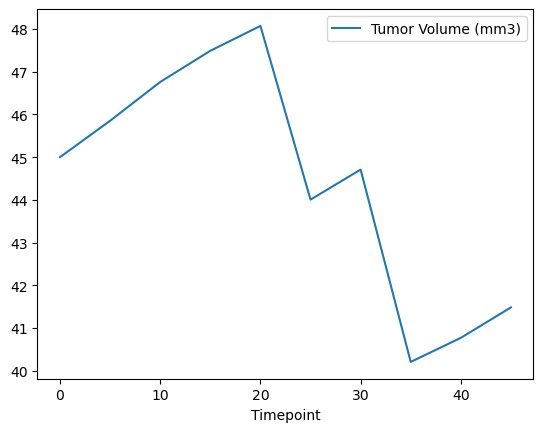

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_only = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin') & 
                                (clean_df['Mouse ID']=='l509')][['Timepoint','Tumor Volume (mm3)']]
cap_only.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
                                    

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume(mm3)'>

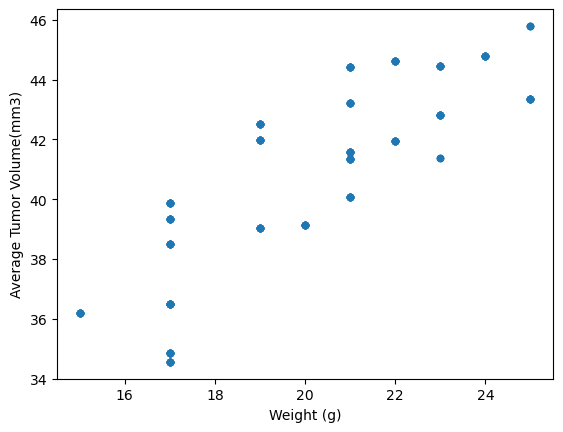

In [100]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_tum = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin')]      
avg_tumor_vol = pd.DataFrame(cap_tum.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume(mm3)'})     
mouse_wt = cap_tum[['Mouse ID','Weight (g)']]
new_df= mouse_wt.merge(avg_tumor_vol, how='left', on='Mouse ID')
new_df.plot.scatter(x='Weight (g)', y='Average Tumor Volume(mm3)')

## Correlation and Regression

The correlation between both factors is 0.83


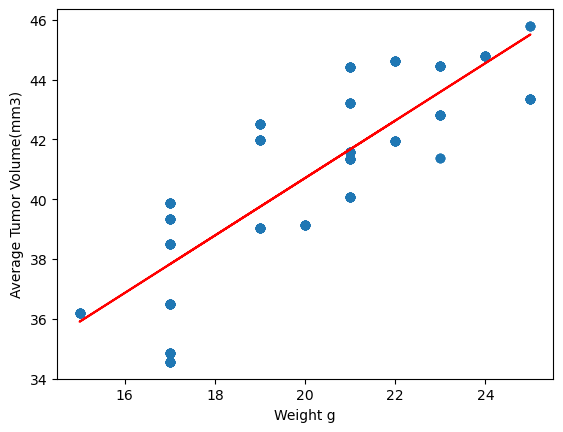

In [101]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = new_df['Weight (g)']
y_values = new_df['Average Tumor Volume(mm3)']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight g')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()